### 

<img src="https://media.giphy.com/media/lF8dlIJ9tWuhWGRwkn/giphy-downsized-large.gif" width=800>


## Initial Focus 

The purpose of this project is to help the Federal Aviation Administration (FAA) predict the flight delays to help them effectively manage the air traffic.


## Background Information


The Federal Aviation Administration (FAA) is responsible for coordinating the complex web of more than 40,000 flights a day over the U.S. Shortly after 7 a.m. ET, there were already 3,500 flights in the air. During peak travel periods, that figure can climb to more than 5,000 flights at once. The FAA recently released a statement claiming it was responsible for less than half of airline delays this year in the US. The announcement came after United Airlines CEO Scott Kirby accused the FAA of being the number one cause of flight delays in the US this year.  In the report, the administration cited statistics from January to May of this year. In these five months, it claims the airlines were responsible for twice as many minutes of flight delays as it was. Flight delays have become a regular enough occurrence that passengers now plan all trips with extra time to account for these delays. The high percentage of flight delays is the result of multiple factors. In addition to the shortages faced by airlines, the FAA has also struggled to keep up with current air travel. The FAA wants to get a hold on the flight delays, and manage the air traffic more efficiently.


## Proposal

The prediction of flight delays depends on a lot of fcators like the travel time, origin, destination, carrier etc. Here are the list of features that can be used to predict whether an employee is able to complete the task at hand or not.

> - status_delayed: Target Variable



| Feature          	| Descriptions                              	                            |
| :---              | :---                                                                      |
| Sch_dep_time: 	| Schedule Departure time.                                                  |
| Carrier*:         | The airline Carrier (Delta, US, Envoy, Continental, Discovery, and other. |
| dest*:            | Flight's final destination (JFK, EWR, LGA).                               |
| origin*:          | Flight's Origin (DCA, IAD, BWI).                                          |
| bad_weather:      | Whether the weather was bad on the given day or not.                      |
| Day:              | Day of the week.                                                          |


## Specification

- Python: 3.9.12
- Pandas: 1.4.3
- Seaborn: 0.11.2
- sklearn: 1.1.2.
- Numpy: 1.21.5

This data contains the data of overall 75 employees.  The target variable of interest is task_completed. The data was provided as a part of our CIS: 508 Assignment.


## Table of Contents: <a class="anchor" id="steps"></a>
- [1. Libraries & Custom Functions](#libraries)
- [2. Data Wrangling](#wrangle)
   - [2.1 Data Gathering](#gather)
   - [2.2 Data Assessment](#assess)
   - [2.3 Data Cleaning](#clean)
- [3. Model Building](#model)
    - [3.1 Model 1](#model001)
    - [3.2 Model 2](#model002)
- [4. Model Comparison](#comparison)
- [5. Model Evaluation](#evaluation)
- [6. Conclusion](#conclusion)
- [7. Deployment](#deployment)


## 1. Libraries & Custom Functions <a class="anchor" id="libraries"></a>

> [Table of Contents](#steps)

In [2]:
import pandas as pd                                                     # Pandas offers data structures and operations for manipulating numerical tables and time series.

from sklearn.linear_model import LogisticRegression                     # The logistic model is a statistical model that models the probability of one event taking place 
                                                                        # by having the log-odds for the event be a linear combination of one or more independent variables.                      

from sklearn.metrics import accuracy_score                              # Importing only the required LogisticRegression, and accuracy_score (this function computes 
                                                                        # subset accuracy)from sklearn, because importing an entire package may be significant waste of RAM.

import pickle                                                           # Using Pickle to convert a Python object into a byte stream to store it in a file/database, 
                                                                        # maintain program state across sessions, making it easier to work with in deployments. 
import seaborn as sns                                                   # Importing Seaborn, A library for making statistical graphics in Python.
import matplotlib.pyplot as plt                                         # Importing matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB.
pd.set_option('display.max_columns', None)                              # To print the above output in a wider format. This attribute is used to set the no. of columns 
                                                                        # to show in the display of the pandas dataframe.
import numpy as np                                                      # NumPy offers support for large, multi-dimensional arrays and matrices, along with a large collection 
                                                                        # of high-level mathematical functions to operate on these arrays.
from itertools import chain                                             # itertools has a collection of functions that are used for handling iterators. chain in particular, 
                                                                        # takes a series of iterables and returns one iterable. It groups all the iterables together and 
                                                                        # produces a single iterable as output. It will used to flatten a 2d lists. 
import re                                                               # Re library helps in searching and replacing. The regex method searches a string and then replace
                                                                        # it with some other value. Python re.sub() function in the re module is used to do so.
import plotly.express as px                                             # Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration.
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.
                                                                            # It helps in identifying multicolinearity among the numerical data. 

# Machine Learning libraries required for Linear Regression.    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.preprocessing import StandardScaler   
# Importing logistic and KNN classifiers from sklearn Library
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# Importing error metrics here.
from sklearn import metrics
import statsmodels.api as sm

# To get rid of scientific notations used to disply large numbers. 
pd.options.display.float_format = '{:.2f}'.format  


In [3]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    FNR = []
    FPR = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.10).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))
        FPR.append((metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] / 
                (metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] + 
                 metrics.confusion_matrix(y_test, y_test_pred_class)[0,0]) ).round(2))
        FNR.append((metrics.confusion_matrix(y_test, y_test_pred_class)[1,0] / 
                (metrics.confusion_matrix(y_test, y_test_pred_class)[1,0] + 
                 metrics.confusion_matrix(y_test, y_test_pred_class)[1,1]) ).round(2))

    # Create dataframe
    result = pd.DataFrame({"Threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FPR":FPR,
                           "FN":FN,
                           "FNR":FNR,
                           "Precision":precision,
                           "Recall":recall,
                           "F1-score":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# Highlight_data function is used to highlight the columns in a data frame with red color, 
# if the value of the particular cell is True. It takes dataframe as an arguement.

def highlight_data(value):                                              
    highlight = 'background-color:  #FFB3BA;'
    if value == True:
            return highlight

# Summary_stats takes dataframe as an argument, it provides the summary statists of all the
# numerical variables in the dataset. The statistics includes, mean, median, standard deviation,
# minimum, maximum, skewness, kurtosis, number of missing values, and whether a coulumn could be
# a potential outlier. It also highlights the potential outliers based on high skewness
# and high kurtosis with red color.
        
def summary_stats(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']     
    df_temp = df.select_dtypes(include=numerics)
    X=(pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min().round(2),
                  max_val = df_temp.max().round(2),
                  skewness = df_temp.skew().round(2),
                  kurtosis = df_temp.kurt().round(2),
                  missing_vals = df_temp.isnull().sum(),
                  potential_outlier = np.where( (df_temp.skew() > 3) | (df_temp.skew() < - 3) | (df_temp.kurt() > 10) | (df_temp.kurt() < -10),
                                                      True,False)
                 )))
    global outlier_columns
    outlier_columns = X[X.potential_outlier==True].index
    X = X.style.format(precision=2).applymap(highlight_data, subset=['potential_outlier'])
    return(X)


## 2. Data Wrangling <a class="anchor" id="wrangle"></a> 

#### 2.1 Data Gathering <a class="anchor" id="gather"></a>

- Loading the Employee dataset into the dataframe for assessment.

> [Table of Contents](#steps)

In [4]:
df = pd.read_csv('FlightDelays_Clean.csv')

#### 2.2 Data Assessment  <a class="anchor" id="assess"></a>

Assessing the employee data. Inspecting the dataset for two things: 
- Data quality issues (i.e. content issues).
- Lack of tidiness (i.e. structural issues). 

In this section, we will look at the structure of the datasets. Check the features present in our data, and then look at their data types. 

> [Table of Contents](#steps)

In [5]:
df.head()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,1,0,0,0,0
1,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,1,0,0,0
2,1,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,1,0,0
3,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,0,1,0
4,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status_delayed       2201 non-null   int64  
 1   sch_dep_time         2201 non-null   float64
 2   carrier_delta        2201 non-null   int64  
 3   carrier_us           2201 non-null   int64  
 4   carrier_envoy        2201 non-null   int64  
 5   carrier_continental  2201 non-null   int64  
 6   carrier_discovery    2201 non-null   int64  
 7   carrier_other        2201 non-null   int64  
 8   dest_jfk             2201 non-null   int64  
 9   dest_ewr             2201 non-null   int64  
 10  dest_lga             2201 non-null   int64  
 11  distance             2201 non-null   int64  
 12  origin_dca           2201 non-null   int64  
 13  origin_iad           2201 non-null   int64  
 14  origin_bwi           2201 non-null   int64  
 15  bad_weather          2201 non-null   i

- There are 2201 rows in the dataset distributed across 22 columns. There are no null values present in the dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status_delayed,2201.00,0.19,0.40,0.00,0.00,0.00,0.00,1.00
sch_dep_time,2201.00,13.86,4.32,6.00,10.00,14.92,17.17,21.50
carrier_delta,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
carrier_us,2201.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00
carrier_envoy,2201.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
carrier_continental,2201.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
carrier_discovery,2201.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
carrier_other,2201.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
dest_jfk,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
dest_ewr,2201.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00


In [8]:
temp = df[['sch_dep_time','distance']]

In [9]:
summary_stats(temp)

,mean,median,std_dev,min_val,max_val,skewness,kurtosis,missing_vals,potential_outlier
sch_dep_time,13.86,14.92,4.32,6.00,21.50,-0.15,-1.01,0,False
distance,211.87,214.00,13.32,169.00,229.00,-1.63,3.42,0,False


- There seems to be no presence of outliers in the dataset.

In [10]:
del(temp) #Deleting the temporary dataframe to free up the memory
df.duplicated().sum()

1319

- There are alot of duplicates in the data here, which we will drop in the next section.

### Summary

- There are no null rows present in the dataset.
- Dtype for each column are appropriate.
- The Dataset has 2201 rows and 22 columns. 
- There are 1319 duplicate rows, which will be dropped in the next section.

#### 2.3 Data Cleaning  <a class="anchor" id="clean"></a>

In this section, We will work on the third step of the data wrangling process, cleaning your data. Here we will focus on two main items that you identified in your assessment in the prior lesson:
- Quality
- Tidiness

> [Table of Contents](#steps)


In [11]:
df[df.duplicated()]

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
8,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,1,0,0,0
9,1,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,1,0,0
11,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,0,0,1
12,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,1,0,0,0,0,0,0
13,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,1,0,0,0
2197,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,1,0,0
2198,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,1,0
2199,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,0,1


In [12]:
# ignore_index=True, ensures that the resulting axis will be labeled 0, 1, …, n - 1.
# There are alot of duplicates in the data, which can have a negative impact on our model. Hence, deleting them would be the best course of action.

df.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
df.duplicated().sum()

0

#### Summary 

- We have dropped around 1319 duplicate rows from the dataset.

## 3. Model Building <a class="anchor" id="model"></a>

In this section we will be creating 2 models, and compute the results from both and compare which one is better.

> - Model 1: Using KNN classification.
> - Model 2: Using Logistic Regression.

> [Table of Contents](#steps)

In [14]:
((df.groupby('status_delayed').status_delayed.count()[1]/df.shape[0])*100).round(2)

35.49

There are aound 35.5% flights which were delayed 

In [15]:
# Taking all the predictor variabls for this model. Before that We will standardize the employee_experience
# variable to better the model.

# Putting all the predictor variables into predictors, and target variable in target. We will then split the
# dataset into training and testing. 

predictors = ['sch_dep_time', 'carrier_delta', 'carrier_us',
       'carrier_envoy', 'carrier_continental', 'carrier_discovery',
       'carrier_other', 'dest_jfk', 'dest_ewr', 'dest_lga', 'distance',
       'origin_dca', 'origin_iad', 'origin_bwi', 'bad_weather', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
target = ['status_delayed']

X = df[predictors]
y = df[target]
# random_state=10
# Splitting the data in a ration of 7:3.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status_delayed,882.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
sch_dep_time,882.00,14.01,4.35,6.00,10.50,14.92,17.25,21.50
carrier_delta,882.00,0.16,0.36,0.00,0.00,0.00,0.00,1.00
carrier_us,882.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
carrier_envoy,882.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
carrier_continental,882.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00
carrier_discovery,882.00,0.26,0.44,0.00,0.00,0.00,1.00,1.00
carrier_other,882.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
dest_jfk,882.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
dest_ewr,882.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00


In [17]:
# Standardizing features by subtracting the mean and then scaling to unit variance. 
# Unit variance means dividing all the values by the standard deviation. It helps in improving the model
# performance by standardizing the variables.
columns_to_scale = ['sch_dep_time', 'distance']

features_means = X_train[columns_to_scale].mean()
features_std = X_train[columns_to_scale].std()

X_train[columns_to_scale] = (X_train[columns_to_scale] - features_means)/features_std
X_test[columns_to_scale] = (X_test[columns_to_scale] - features_means)/features_std

### 3.1 Model 1 <a class="anchor" id="model001"></a> 

#### KNN Classification

In [18]:
# Training KNN classifier with multiple values of k to compute the best k for the model.

results = []
x = [1,3,5,7,9,11,13,15,17,19,21]
for k in x:
    
# Creating the object for the KNN model
# fitting the model on the train and test data

    model_knn = KNeighborsClassifier(n_neighbors=k)
    
# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)
# the labels were in a column format while it expected it in a row.

    model_knn.fit(X_train,y_train.values.ravel())
    
    y_pred = model_knn.predict(X_test)
    
    results.append(
    {
        'k':k,
        'False_Positive_Rate':(metrics.confusion_matrix(y_test, y_pred)[0,1] / 
                (metrics.confusion_matrix(y_test, y_pred)[0,1] + 
                 metrics.confusion_matrix(y_test, y_pred)[0,0]) ).round(2),
        'False_Negative_Rate':((metrics.confusion_matrix(y_test, y_pred)[1,0] / 
                (metrics.confusion_matrix(y_test, y_pred)[1,0] + 
                 metrics.confusion_matrix(y_test, y_pred)[1,1]) ).round(2)),
        'Accuracy':metrics.accuracy_score(y_test,y_pred),
        'F1-score':(metrics.f1_score(y_test, y_pred).round(2))
    }
    )

results = pd.DataFrame(results)
display(results)

,k,False_Positive_Rate,False_Negative_Rate,Accuracy,F1-score
0,1,0.50,0.75,0.42,0.22
1,3,0.36,0.78,0.50,0.23
2,5,0.28,0.81,0.54,0.22
3,7,0.25,0.82,0.56,0.21
4,9,0.24,0.79,0.57,0.25
5,11,0.20,0.81,0.60,0.24
6,13,0.17,0.89,0.59,0.16
7,15,0.16,0.89,0.60,0.16
8,17,0.15,0.89,0.60,0.16
9,19,0.12,0.91,0.62,0.14


The FAA carries a huge responsibility – from directing air traffic in and around the nation and helping ensure 
protection of the public during space launches, to airport safety and inspections, and standards for airport design, 
construction, and operation; regulating flight inspection standards and advancing satellite and navigation technology, 
to developing and maintaining the Next Generation Air Transportation System (NextGen). In order to evaluate the model, we will be looking at both Recall and the Precision. 

A large number of False Negatives and Fale Positives can lead to a lot of operational issues like The assignment of Landing strip, Terminals, on ground safety measures, and operations team. Hence, we will be evaluating K on the basis of F-1 Score here. More on this will be elaborated in the later section. 

k=11, produced the maximum F-1 Score, while keeping False Negatives and Positives at bay. Now, we will train our model with k=11, and compute the performance measure at various probability thresholds. 

In [19]:
del(results,x)
global k
k = 9

In [21]:

model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train,y_train.values.ravel())
    
# Calling the function class_perf_measures to evaluate the performance metrics over multiple threshold values. 
class_perf_measures(model_knn,X_test,y_test)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FPR,FN,FNR,Precision,Recall,F1-score,Accuracy
0,0.00,89,0,176,1.00,0,0.00,0.34,1.00,0.50,0.34
1,0.10,88,10,166,0.94,1,0.01,0.35,0.99,0.51,0.37
2,0.20,77,30,146,0.83,12,0.13,0.34,0.86,0.49,0.40
3,0.30,63,61,115,0.65,26,0.29,0.35,0.71,0.47,0.47
4,0.40,42,99,77,0.44,47,0.53,0.35,0.47,0.40,0.53
5,0.50,19,133,43,0.24,70,0.79,0.31,0.21,0.25,0.57
6,0.60,6,162,14,0.08,83,0.93,0.30,0.07,0.11,0.63
7,0.70,2,176,0,0.00,87,0.98,1.00,0.02,0.04,0.67
8,0.80,0,176,0,0.00,89,1.00,0.00,0.00,0.00,0.66
9,0.90,0,176,0,0.00,89,1.00,0.00,0.00,0.00,0.66


> In KNN, at k=11 the ideal choice would be to go with the probability threshold of 0.40. It tries to keep the False Positive and the False Negative rate at bay. We can't have a higher value in any of these. The model does not seem to be performing well here, The F-1 score is also Low here at 0.40.

### 3.2 Model 2 <a class="anchor" id="model002"></a> 

#### Logistic Regression

In [20]:
model_logit = LogisticRegression()
model_logit.fit(X_train,y_train.values.ravel())
class_perf_measures(model_logit,X_test,y_test)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FPR,FN,FNR,Precision,Recall,F1-score,Accuracy
0,0.00,89,0,176,1.00,0,0.00,0.34,1.00,0.50,0.34
1,0.10,89,0,176,1.00,0,0.00,0.34,1.00,0.50,0.34
2,0.20,79,34,142,0.81,10,0.11,0.36,0.89,0.51,0.43
3,0.30,68,65,111,0.63,21,0.24,0.38,0.76,0.51,0.50
4,0.40,39,114,62,0.35,50,0.56,0.39,0.44,0.41,0.58
5,0.50,13,155,21,0.12,76,0.85,0.38,0.15,0.21,0.63
6,0.60,9,176,0,0.00,80,0.90,1.00,0.10,0.18,0.70
7,0.70,9,176,0,0.00,80,0.90,1.00,0.10,0.18,0.70
8,0.80,9,176,0,0.00,80,0.90,1.00,0.10,0.18,0.70
9,0.90,5,176,0,0.00,84,0.94,1.00,0.06,0.11,0.68


> In Logistic Regression, the ideal choice would be to go with the probability threshold of 0.40. It tries to keep the False Positive and the False Negative rate at bay. We can't have a higher value in any of these. The model still functions better then the K-1 but does not seem to be performing well here overall, The F-1 score is also Low here at 0.41.

### Summary

- 'k' hyper-paramter has been assigned the value of 9.
- We have run the KNN Classifier with k=9, over multiple threshold values.
- We have also run the Logistic Regression, over multiple threshold values.

## 4. Model Comparison <a class="anchor" id="comparison"></a>

> [Table of Contents](#steps)

For comparing the KNN and Logistic Regression models, we will be considering False Negative Rate, False Positive rate and in turn F-1 score to compute which model is performing better.

At 0.40 Threshold, both the models gave their best performances. The F-1 score for KNN was 0.40, while for the Logistic it was 0.41 which is still a pretty ok score. However on the lower end only. Now we will be moving forward with the ROC Curve to compute the area under the curve on different probability thersholds. The model with the highest AUC will also help in considering which is as a better fit model.

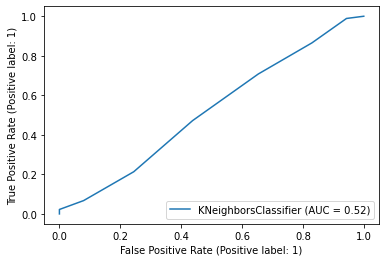

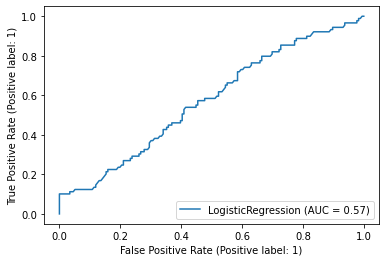

In [21]:
# ROC curve for kNN
metrics.RocCurveDisplay.from_estimator(model_knn,X_test,y_test)
plt.show()

metrics.RocCurveDisplay.from_estimator(model_logit,X_test,y_test)
plt.show()

From the above ROC Curves we can compute that Logistic Regression is a better model for this dataset then KNN Classifier, with only slight differences. The AUC of Logistic comes out to be 0.57, while for KNN it is 0.53. The F-1 of Logisitc was also a bit better then KNN. Hence, we will be moving forward with the Logistic model.

## 5. Model Evaluation <a class="anchor" id="evaluation"></a>

> [Table of Contents](#steps)

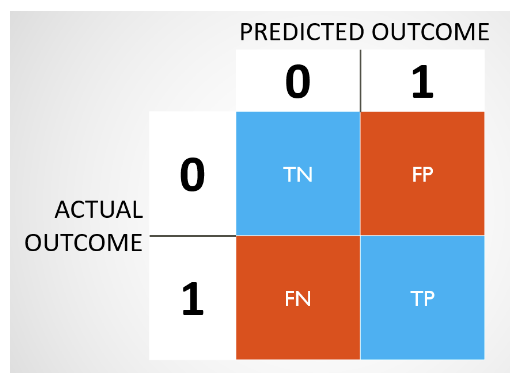

In this problem we are looking to minimize both the **False Positives & False Negatives**. 

- *False Postives:* We don't want to falsly predict that a flight will be delayed when it is not, as there are a lot of operational costs associated with it like, assuming the flight is delayed the Terminal might be allocated to some other flight, or the landing strip for that interval is assigned to a separate aircraft. The availability of ground staff might also be an issue, since the flight was not expected to land any time soon the Aircraft Marshallers might be occupied in other work. So could be the issue with the safety measures in place.

- *False Negatives:* We don't want to falsly predict that a flight will be on time, when it is delayed. There are again similar operational costs associated with it, like availability of the landing strip or the hanger to park the plane, and the air marshall could become difficult to look upon. So could be the case with the safety measures in place.


<hr>

The **False Positive Rate** is calculated as FP/FP+TN, where FP is the number of false positives and TN is the number of true negatives (FP+TN being the total number of negatives). It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative.

<hr>

The **False Negative Rate** – also called the miss rate – is the probability that a true positive will be missed by the test. It’s calculated as FN/FN+TP, where FN is the number of false negatives and TP is the number of true positives (FN+TP being the total number of positives).

<hr>

**F-1 Score**
F1-score is one of the most important evaluation metrics in machine learning. It elegantly sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall. It is possible that for our use-case the errors caused by FPs and FNs are (almost) equally undesirable. Hence, you may wish for a model to have as few FPs and FNs as possible. Put differently, you would want to maximise both precision and recall. In practice, it is not possible to maximise both precision and recall at the same time because of the trade-off between precision and recall. By definition, F1-score is the harmonic mean of precision and recall. It combines precision and recall into a single number using the following formula:

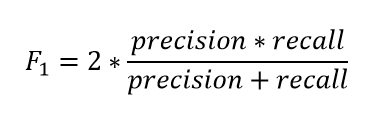

<hr>

[**Probability Thresholds**](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)
The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1.

For example, on a binary classification problem with class labels 0 and 1, normalized predicted probabilities and a threshold of 0.5, then values less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

- Prediction < 0.5 = Class 0
- Prediction >= 0.5 = Class 1

The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities. This could be possible when, 
- The class distribution is severely skewed.
- The cost of one type of misclassification is more important than another type of misclassification.

Hence, for the Logistic Regression we will compute the metrics at different thresholds and interpret the results.

<hr>


<h1>Threshold: 0.20</h1>

| Threshold:     	    |        0.20                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 81%                                           |
| False Negative Rate:  | 11%                                           |
| F-1 Score:            | 0.51                                          |
| Accuracy:             | 0.43                                          |

> At Threshold 0.10, the **False Positive Rate** comes out to be 81%. There is  81% probability that a flight is likely to be on time when it was predicted to be delayed. 81% is a very high probability for such occurance. It can lead to severe operational costs.

> **False Negative Rate** comes out to be 11%, which is good. It signifies that, there is only 11% probability that a flight is likely to be delayed when it was predicted to be on time. The model can be efficient at 11% FNR. However, the FPR is very high here.

> **F-1 Score** It sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall. We want to maximise both precision and recall. In practice, it is not possible to maximise both precision and recall at the same time because of the trade-off between precision and recall. The higher the value of F-1 score the better our model performs. A F-1 score of 0.51 is considered to be an average score. We need to look for better models. 


<hr>

<h1>Threshold: 0.30</h1>

| Threshold:     	    |        0.30                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 63%                                           |
| False Negative Rate:  | 24%                                           |
| F-1 Score:            | 0.51                                          |
| Accuracy:             | 0.50                                          |

> At Threshold 0.30, the **False Positive Rate** comes out to be 63%. There is  63% probability that a flight is likely to be on time when it was predicted to be delayed. 63% is a high probability for such occurance. It can lead to severe operational costs.

> **False Negative Rate** comes out to be 24%, which is decent. It signifies that, there is only 24% probability that a flight is likely to be delayed when it was predicted to be on time. The model can be efficient at 24% FNR. However, the FPR is high here.

> **F-1 Score** It sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall. We want to maximise both precision and recall. In practice, it is not possible to maximise both precision and recall at the same time because of the trade-off between precision and recall. The higher the value of F-1 score the better our model performs. A F-1 score of 0.51 is considered to be an average score. We need to look for better models. 


<hr>

<h1>Threshold: 0.30</h1>

| Threshold:     	    |        0.60                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 0%                                            |
| False Negative Rate:  | 80%                                           |
| F-1 Score:            | 0.18                                          |
| Accuracy:             | 0.70                                          |

> At Threshold 0.60, the **False Positive Rate** comes out to be 0%. There is  0% probability that a flight is likely to be on time when it was predicted to be delayed. This is the ideal state of the model. However, the FNR is still very high, and the F-1 Score is pretty low.

> **False Negative Rate** comes out to be 80%, which is very high. It signifies that, there is 80% probability that a flight is likely to be delayed when it was predicted to be on time. This rate needs to be reduced to bring about a change in the F-1 score.

> **F-1 Score** It sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall. We want to maximise both precision and recall. In practice, it is not possible to maximise both precision and recall at the same time because of the trade-off between precision and recall. The higher the value of F-1 score the better our model performs. A F-1 score of 0.11 is considered to be a very low score. We need to look for better models. 


<hr>

## 6. Conclusion <a class="anchor" id="conclusion"></a>

> [Table of Contents](#steps)


After careful consideration of multiple probability threshold options and the corresponding speculated risks/costs. Probabilty Threshold of **0.30** seems to be the least undesirable choice here. At 0.30 threshold, the F-1 Score comes out to be 51% which so far the highest in this model. It is trying to keep both the False Positives and False Negatives at bay. This is by far the best performane across all the probability thresholds, which is not good for prediction. So, we should be out there looking for a better model.

<hr>

## 7. Deployment <a class="anchor" id="deployment"></a>

> [Table of Contents](#steps)


In [22]:
df.head()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,1,0,0,0,0
1,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,1,0,0,0
2,1,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,1,0,0
3,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,0,1,0
4,0,14.92,1,0,0,0,0,0,1,0,0,213,1,0,0,0,0,0,0,0,0,0,1


In [23]:
features = [features_means, features_std]

In [24]:
pickle_out = open('classifier_flight', mode='wb')                             # Here we are creating a new object 'pickle_out'. This will contain a new file 'classifier'  
                                                                       # in wb(write binary) mode to save the pickled data.

pickle.dump(model_logit, pickle_out)                                   # Here, the Logistic model is converted into byte stream and saved in 'model_logit'.
pickle.dump(model_knn, pickle_out)                                     # Here, the KNN model is converted into byte stream and saved in 'model_knn'.
features = [features_means, features_std]                              # Creating a list of features to pass into the pickle file
pickle.dump(features, pickle_out)

pickle_out.close()                                                     # Closing the file object. 

In [25]:
%%writefile Flight_delay_app.py                                                     
                                                                       # %%writefile is used to write the code in this given block to a file called app.py, which will
                                                                       # be created in the same directory. 
import pickle                                                          # Importing the Pickle Library here to execute the app.py file without fail.
import streamlit as st                                                 # Importing the Streamlit library. Streamlit lets you turn data scripts into shareable web apps.
import extra_streamlit_components as stx
import time

pickle_in = open('classifier_flight', 'rb')                                   # Opening Classifier in read-byte mode. 
model_logit = pickle.load(pickle_in)                                   # Pickle load is used to load pickled data from a file-like object.
model_knn = pickle.load(pickle_in)                                     # HEre, pickle is loading both KNN and Logistic regression models.
features = pickle.load(pickle_in)
st.set_page_config(layout="centered")

IMAGE_URL = "https://i.ibb.co/8gfCxvR/flight-img.png"
st.image(IMAGE_URL, width=700)


@st.cache()                                                            # Marking the function with cache decorator (st.cache()) will allow streamlit to keep all the 
                                                                       # states of a function in the memory. Hence, on every refresh the function definition is not executed.
    
def prediction(sch_dep_time, carrier_delta, carrier_us, carrier_envoy, carrier_continental, carrier_discovery, carrier_other, dest_jfk, dest_ewr, dest_lga, distance, origin_dca, origin_iad, origin_bwi, bad_weather, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, chosen_id):
    if chosen_id == '1':                                               # Based on the user's preference we are running the model (KNN or Logistic)
        classifier = model_knn
        model = 'KNN'
    else: 
        classifier = model_logit
        model = 'Logistic Regression'
       
    prediction = classifier.predict(                                   # method predict() that will essentially use the learned parameters by fit() in order to
                                                                       # perform predictions for each test instance.
        [[sch_dep_time, carrier_delta, carrier_us, carrier_envoy, carrier_continental, carrier_discovery, carrier_other, dest_jfk, dest_ewr, dest_lga, distance, origin_dca, origin_iad, origin_bwi, bad_weather, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]])
  
    return (prediction,model)


def main():                                                           # This is the main function in which we define our webpage

    carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other=0,0,0,0,0,0             # Using a slide bar to input the employee work experience
    sch_dep_time = st.slider("Scheduled Departure time",
                                  min_value=0.0,
                                  max_value=22.00,
                                  value=0.0,
                                  step=0.10,
                                 )

    carriers = st.selectbox('Please select the carrier',
                              ('Delta',
                               'US',                            # Creating a drop down to handle the categorical variables.
                               'Envoy',
                               'Continental',
                               'Discovery',
                               'Others'
                              )
                                 )
               
    if carriers=='Delta':                                    # Based on the used's preference populating the training_level4, training_level6, training_level8 columns in dataset.
                                  carrier_delta =1
    elif carriers=='US':
                                  carrier_us =1
    elif carriers=='Envoy':
                                  carrier_envoy =1
    elif carriers=="Continental":
                                  carrier_continental=1
    elif carriers=="Discovery":
                                  carrier_discovery=1
    elif carriers=="Others":
                                  carrier_other=1
            
    dest_jfk, dest_ewr, dest_lga=0,0,0
            
    destination = st.selectbox('Please select the Destination',
                              ('JFK',
                               'EWR',                            # Creating a drop down to handle the categorical variables.
                               'LGA'
                              )
                                 )  
    if destination == "JFK":
        dest_jfk = 1
    elif destination == "EWR":
        dest_ewr = 1
    elif destination == "LGA":
        dest_lga = 1
        
        
    distance = st.slider("Distance",
                                  min_value=160,
                                  max_value=230,
                                  value=0,
                                  step=1,
                                 )
        
    origin_dca,origin_iad,origin_bwi = 0,0,0  
    origins = st.selectbox('Please select the Origin',
                          (
                          "DCA",
                          "IAD",
                          "BWI"
                          )
                          )
    if origins == "DCA":
        origin_dca =1
    elif origins == "IAD":
        origin_iad = 1
    elif origins == "BWI":
        origin_bwi = 1
    
    bad_weather = 0
    
    weather = st.radio(
    "Weather conditions:",
    ('Good', 'Bad'))

    if weather == 'Good':
        bad_weather = 0
    else:
        bad_weather = 1
    
    weekday = st.selectbox('Please select the Day of the Week',
                          (
                          "Monday",
                          "Tuesday",
                          "Wednesday",
                          "Thursday",
                              "Friday",
                              "Saturday",
                              "Sunday"
                          )
                          )
    Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday = 0,0,0,0,0,0,0 
    
    if weekday == "Monday":
        Monday = 1
    elif weekday == "Tuesday":
        Tuesday = 1
    elif weekday == "Wednesday":
        Wednesday = 1
    elif weekday == "Thursday":
        Thursday = 1
    elif weekday == "Friday":
        Friday = 1
    elif weekday == "Saturday":
        Saturday = 1
    elif weekday == "Sunday":
        Sunday = 1
        
        
    sch_dep_time = (sch_dep_time-features[0][0])/features[1][0]
    distance = (distance-features[0][1])/features[1][1]

    
    chosen_id = stx.tab_bar(data=[                                   # Allowing user to choose between the models.
    stx.TabBarItemData(id=1, title="KNN Classifier", description="F-1 Score: 40% | Accuracy: 53%"),
    stx.TabBarItemData(id=2, title="Logistic Regression", description="F-1 Score: 41% | Accuracy: 58%"),
    ],default=1)
    st.info('Recommendation based on the AUC-ROC Curve: Logistic Regression', icon="ℹ️")

  
    result = ""
                                  
    if st.button("Predict"):                                          # When 'Predict' is clicked(using st.button), make the prediction and store it in result.
        results = prediction(sch_dep_time, carrier_delta, carrier_us, carrier_envoy, carrier_continental, carrier_discovery, carrier_other, dest_jfk, dest_ewr, dest_lga, distance, origin_dca, origin_iad, origin_bwi, bad_weather, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, chosen_id)
        with st.spinner('Running the '+results[1]+' model'):
            time.sleep(1)
            if results[0] == 0:
                st.error('Flight will be delayed!', icon="🚨")
            else:
                st.success('Flight will be on-time!', icon="✅")
#                 st.balloons()
            

            
if __name__=='__main__':                                              # The value of __name__ attribute is set to “__main__” when module is run as main program. 
    main()
    

Overwriting Flight_delay_app.py


In [27]:
!streamlit run Flight_delay_app.py                                                 # Running the app.py using streamlit.

^C
